In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
df1=pd.read_csv("train.csv")

In [88]:
df1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [89]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

<AxesSubplot:>

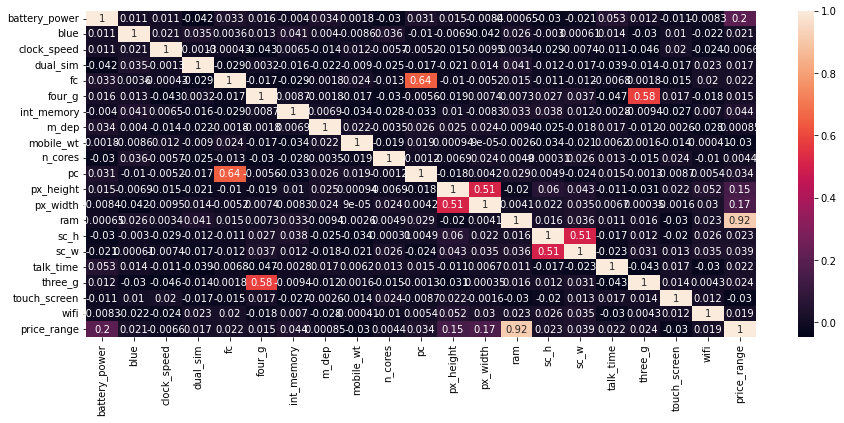

In [90]:
fig, ax = plt.subplots(figsize = (15,6))
sns.heatmap(df1.corr(),annot=True)

In [91]:
##less correlation clock_speed,m_dep,mobile_wt,n_cores,touch_screen
df=df1.drop(['clock_speed','m_dep','mobile_wt','n_cores','touch_screen','talk_time'],axis=1)

<AxesSubplot:>

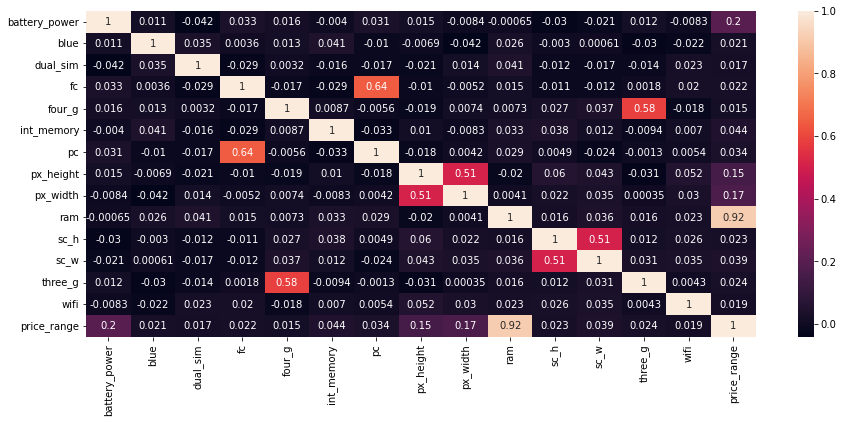

In [92]:
fig, ax = plt.subplots(figsize = (15,6))
sns.heatmap(df.corr(),annot=True)

In [93]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.5185,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.4950,0.500100,0.0,0.00,0.0,1.00,1.0
dual_sim,2000.0,0.5095,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.3095,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.5215,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.0465,18.145715,2.0,16.00,32.0,48.00,64.0
pc,2000.0,9.9165,6.064315,0.0,5.00,10.0,15.00,20.0
px_height,2000.0,645.1080,443.780811,0.0,282.75,564.0,947.25,1960.0
px_width,2000.0,1251.5155,432.199447,500.0,874.75,1247.0,1633.00,1998.0
ram,2000.0,2124.2130,1084.732044,256.0,1207.50,2146.5,3064.50,3998.0


In [94]:
x=df.iloc[:,:-1]

In [95]:
y=df.iloc[:,-1]

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=7)

In [98]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1600, 14) (400, 14) (1600,) (400,)


In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
lr=LinearRegression()

In [101]:
lr=lr.fit(x_train,y_train)

In [102]:
y_pred=lr.predict(x_test)

In [103]:
from sklearn.metrics import r2_score

In [104]:
r2_score(y_pred,y_test)

0.9108423164956264

In [105]:
from sklearn.metrics import mean_squared_error

In [106]:
mean_squared_error(y_pred,y_test)

0.10686144252700336

In [107]:
import statsmodels.api as sm

In [108]:
x = sm.add_constant(x_train)
results = sm.OLS(y_train, x).fit()

results.summary()

C:\Users\navna\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            price_range   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     1266.
Date:                Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:31:50   Log-Likelihood:                -444.84
No. Observations:                1600   AIC:                             919.7
Df Residuals:                    1585   BIC:                             1000.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.7432      0.052    -33.693      0.000      -1.845      -1.642
battery_power     0.0005   1.84e-05     27.860      0.000       0.000       0.001
blue              0.0134      0.016      0.833      0.405      -0.018       0.045
dual_sim         -0.0365      0.016     -2.269      0.023      -0.068      -0.005
fc                0.0008      0.002      0.347      0.729      -0.004       0.006
four_g           -0.0029      0.020     -0.149      0.882      -0.042       0.036
int_memory        0.0007      0.000      1.608      0.108      -0.000       0.002
pc                0.0007      0.002      0.416      0.677      -0.003       0.004
px_height         0.0003   2.11e-05     13.062      0.000       0.000       0.000
px_width          0.0003   2.17e-05     13.604      0.000       0.000       0.000
ram               0.0009   7.42e-06    127.782      0.000       0.001       0.001
sc_h              0.0008      0.002      0.385      0.700      -0.003       0.005
sc_w             -0.0005      0.002     -0.254      0.799      -0.005       0.004
three_g           0.0340      0.023      1.465      0.143      -0.012       0.079
wifi             -0.0080      0.016     -0.497      0.619      -0.040       0.024
==============================================================================
Omnibus:                       83.594   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.263
Skew:                           0.038   Prob(JB):                     5.98e-08
Kurtosis:                       2.298   Cond. No.                     1.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
import pickle

In [110]:
#pickle.dump(lr,open('lr.pkl','wb'))

In [111]:
#pickled_model = pickle.load(open('lr.pkl', 'rb'))

In [112]:
#pickled_model.predict(x_test)

Decision Tree

In [134]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
dtree = DecisionTreeClassifier()

In [135]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [137]:
dtree.score(x_test,y_test)

0.875

In [140]:
predictions=dtree.predict(x_test)

In [141]:
accuracy_score(y_test,predictions)

0.875

In [132]:
#pickle.dump(drtree,open('lr_dtree.pkl','wb'))

[Text(171.6175388755981, 208.38, 'X[9] <= 2235.5\ngini = 0.75\nsamples = 1600\nvalue = [391, 411, 394, 404]'),
 Text(77.45503887559809, 190.26, 'X[9] <= 1106.0\ngini = 0.581\nsamples = 829\nvalue = [391, 359, 79, 0]'),
 Text(38.145574162679424, 172.14, 'X[7] <= 1231.5\ngini = 0.216\nsamples = 358\nvalue = [314, 44, 0, 0]'),
 Text(27.432775119617226, 154.01999999999998, 'X[0] <= 1816.5\ngini = 0.133\nsamples = 321\nvalue = [298, 23, 0, 0]'),
 Text(18.02153110047847, 135.89999999999998, 'X[8] <= 1873.0\ngini = 0.062\nsamples = 283\nvalue = [274, 9, 0, 0]'),
 Text(10.41244019138756, 117.77999999999999, 'X[9] <= 1024.0\ngini = 0.037\nsamples = 263\nvalue = [258, 5, 0, 0]'),
 Text(4.8057416267942585, 99.66, 'X[0] <= 1504.0\ngini = 0.017\nsamples = 236\nvalue = [234, 2, 0, 0]'),
 Text(3.2038277511961724, 81.53999999999999, 'gini = 0.0\nsamples = 184\nvalue = [184, 0, 0, 0]'),
 Text(6.407655502392345, 81.53999999999999, 'X[0] <= 1516.5\ngini = 0.074\nsamples = 52\nvalue = [50, 2, 0, 0]'),
 Te

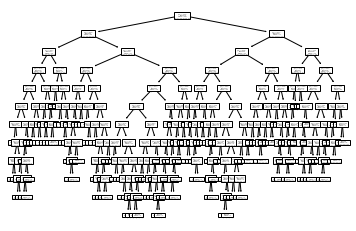

In [142]:
tree.plot_tree(dtree)

Logistic regression

In [32]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [33]:
logmodel.fit(x_train,y_train)

C:\Users\navna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
logmodel.score(x_test,y_test)

0.565

KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [44]:
lr_knn=knn.fit(x_train,y_train)

In [45]:
knn.score(x_test,y_test)

0.93

In [38]:
#pickle.dump(lr_knn,open('lr_knn.pkl','wb'))

In [39]:
error_rate = []
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

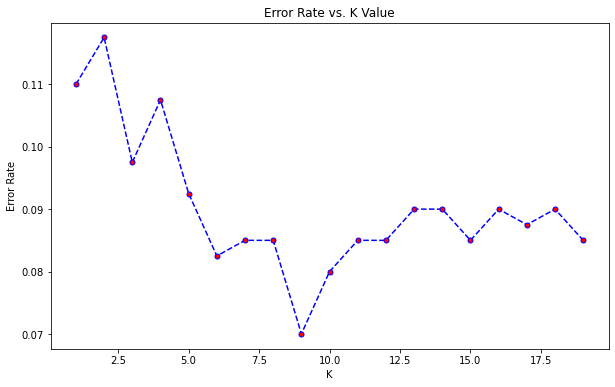

In [40]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Minimum error:- 0.07 at K = 9


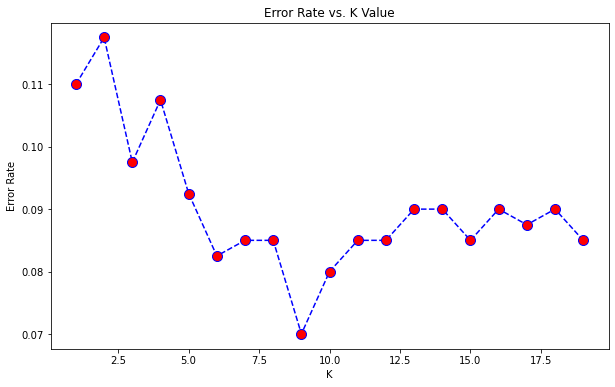

In [42]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
req_k_value = error_rate.index(min(error_rate))+1
print("Minimum error:-",min(error_rate),"at K =",req_k_value)

In [46]:
import sklearn
sklearn.__version__

'0.24.2'

In [47]:
from sklearn.neighbors import _dist_metrics